In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

num_rows = 50
num_features = 2
probs = [0.5, 0.2, 0.3]

X, y = generate_imbalanced_data(num_rows, num_features; probs, type="DictColTable")

Xm = Tables.matrix(X)

50×2 Matrix{Float64}:
 0.956394   0.154091
 0.603978   0.601951
 0.22947    0.751995
 0.281775   0.105565
 0.486059   0.851284
 0.79586    0.706376
 0.696118   0.69063
 0.0746706  0.197754
 0.979123   0.504271
 0.833407   0.573023
 ⋮          
 0.138255   0.316649
 0.0875348  0.869601
 0.554194   0.466107
 0.989934   0.968239
 0.807525   0.123036
 0.998416   0.902006
 0.0958688  0.815592
 0.975186   0.649682
 0.770325   0.475157

### 2. Apply ROSE

In [3]:
Xover, yover = ROSE(Xm, y; ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=rng)

([0.9563940848779163 0.15409142391053554; 0.6039778761209398 0.6019506292270279; … ; 0.11736732376943725 0.8289418052412627; 0.8086965101135134 0.6626002158780784], CategoricalValue{Int64, UInt32}[0, 0, 0, 2, 0, 1, 0, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 3. Plot the Results

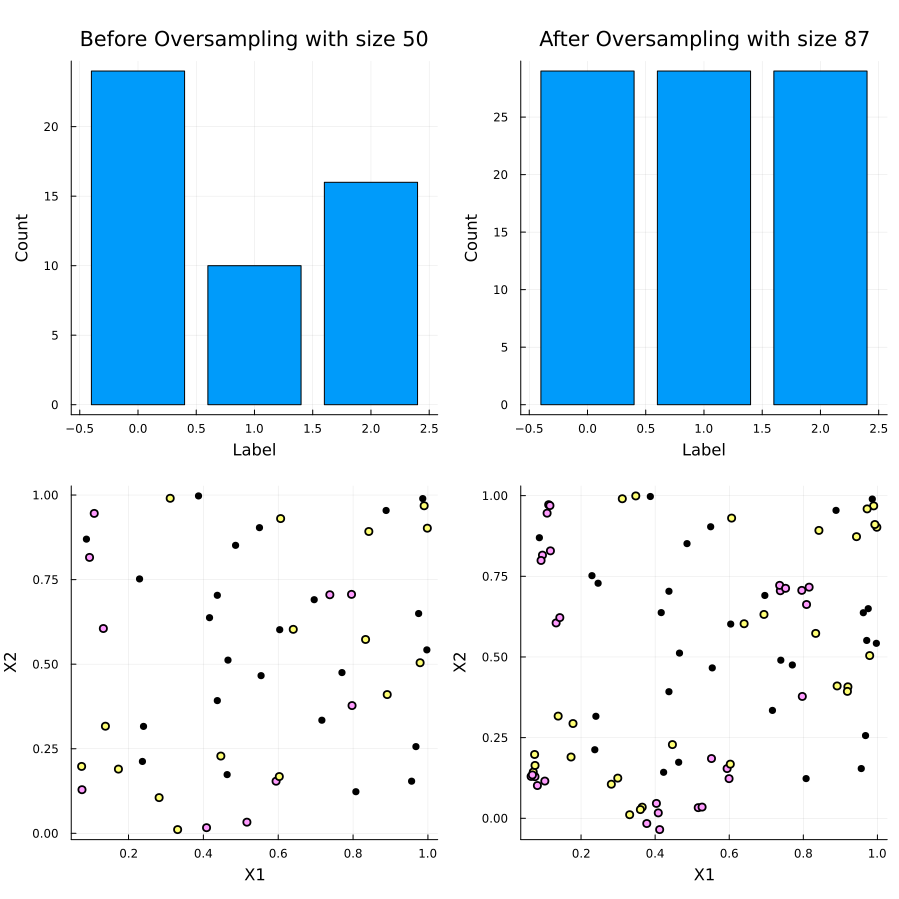

In [4]:
plot_data(y, yover, X, Xover)